<a href="https://colab.research.google.com/github/kaveri17-K/Housing_Predictive_Analytics/blob/main/Housing_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
df = pd.read_csv("housing.csv")

In [20]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


In [21]:
df.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]>

In [29]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


In [30]:
df.fillna(df.median(), inplace=True)

In [31]:
x=np.array(df.iloc[0:200,2]).reshape(-1,1) #converted into array & reshape is used to convert row into column
y=np.array(df.iloc[0:200,5]).reshape(-1,1)

In [32]:
# Target Column
x = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
# Prediction
y_pred = model.predict(x_test)

In [39]:
# Evaluaton
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score (Accuracy):", round(r2, 3))
print("RMSE:", round(rmse, 3))

R² Score (Accuracy): 0.625
RMSE: 70060.522


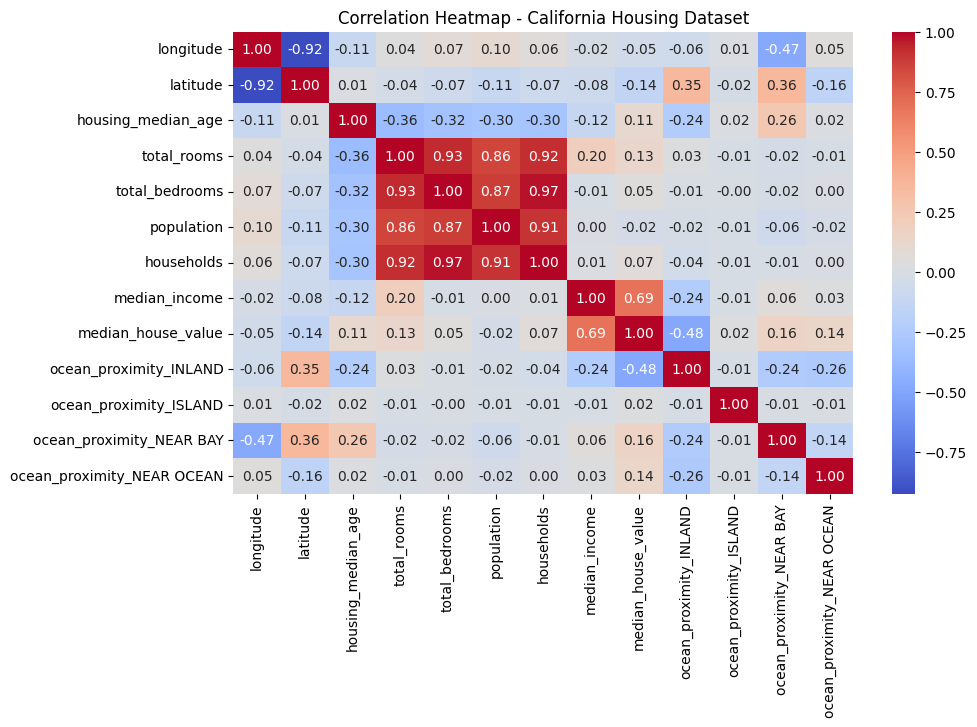

In [40]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - California Housing Dataset")
plt.show()

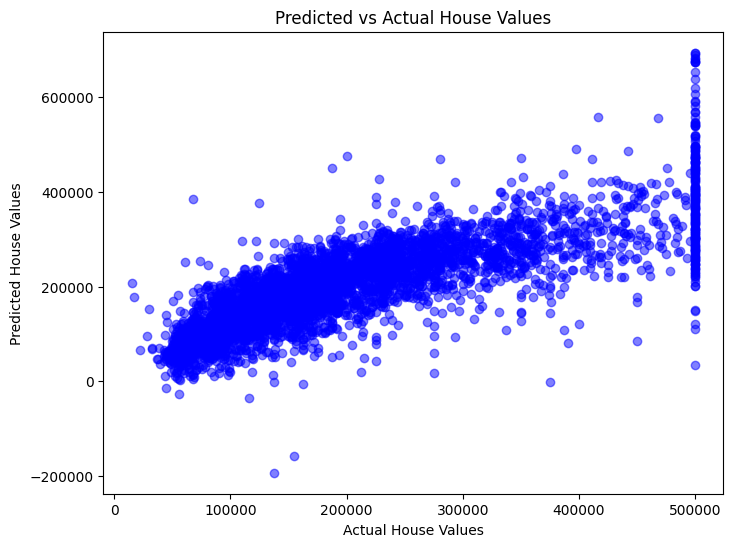

In [41]:
# Predictions vs Actuals
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("Predicted vs Actual House Values")
plt.show()